In [0]:
!pip install tensorflow==2.0

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [2]:
print(x_train.shape)

(60000, 28, 28)


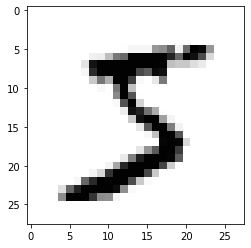

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = 'Greys', interpolation = 'None')

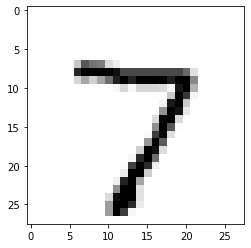

In [4]:
plt.imshow(x_test[0], cmap = 'Greys', interpolation = 'None')

In [5]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)


In [6]:
from tensorflow.keras import utils

n_classes = 10

y_train = utils.to_categorical(y_train, n_classes)
y_test = utils.to_categorical(y_test, n_classes)

print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten, Dropout

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 160s 3ms/sample - loss: 0.2336 - accuracy: 0.9278 - val_loss: 0.0533 - val_accuracy: 0.9829
Epoch 2/10
60000/60000 [==============================] - 159s 3ms/sample - loss: 0.0853 - accuracy: 0.9744 - val_loss: 0.0402 - val_accuracy: 0.9878
Epoch 3/10
60000/60000 [==============================] - 158s 3ms/sample - loss: 0.0629 - accuracy: 0.9805 - val_loss: 0.0327 - val_accuracy: 0.9893
Epoch 4/10
60000/60000 [==============================] - 158s 3ms/sample - loss: 0.0514 - accuracy: 0.9839 - val_loss: 0.0299 - val_accuracy: 0.9898
Epoch 5/10
60000/60000 [==============================] - 157s 3ms/sample - loss: 0.0448 - accuracy: 0.9858 - val_loss: 0.0258 - val_accuracy: 0.9913
Epoch 6/10
60000/60000 [==============================] - 155s 3ms/sample - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.0252 - val_accuracy: 0.9914
Epoch 7/10
60000/60000 [==========================

In [13]:
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss: ", score[0])
print("Test accuracy: ",score[1])

Test loss:  0.026896621553447096
Test accuracy:  0.992


In [16]:
#Save the model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
